# ENEM 2023

Os microdados do ENEM 2023 podem ser encontrados no link:
https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

Será feito uma análise de desempenho no ENEM 2023 para estudantes com diferentes declarações de cor/ raça.

Estudantes que não receberam notas ou tiveram notas zeradas não são considerados nos cálculos para a nota final média.

Segundo o dicionário dos dados, a variável 'TP_COR_RACA' pode apresentar 7 valores numéricos:

0. Não declarado;
1. Branca;
2. Preta;
3. Parda;
4. Amarela;
5. Indígena;
6. Não dispõe da informação.

As notas nas provas das áreas e redação estão presentes nas variáveis:

NU_NOTA_CN: Nota da prova de Ciências da Natureza;

NU_NOTA_CH: Nota da prova de Ciências Humanas;

NU_NOTA_LC: Nota da prova de Linguagens e Códigos;

NU_NOTA_MT: Nota da prova de Matemática;

NU_NOTA_REDACAO: Nota da prova de redação.

In [1]:
# Importando as bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [2]:
# Verificar qual encoding pode ser usado para ler o arquivo:
encodings = ['UTF-8', 'latin-1']

for encoding in encodings:
    try:
        with open(r"C:\Users\hugob\OneDrive\Desktop\microdados_enem_2023\DADOS\MICRODADOS_ENEM_2023.csv", encoding=encoding) as f:
            data = f.read()
        print(f'Arquivo lido com sucesso usando encoding: {encoding}')
        break
    except UnicodeDecodeError:
        print(f'Erro ao ler usando encoding: {encoding}')

Erro ao ler usando encoding: UTF-8
Arquivo lido com sucesso usando encoding: latin-1


In [3]:
# Carregar o arquivo csv:
microdados_ENEM_2022 = r"C:\Users\hugob\OneDrive\Desktop\microdados_enem_2023\DADOS\MICRODADOS_ENEM_2023.csv"
df = pd.read_csv(microdados_ENEM_2022, encoding='latin-1', sep=';')

In [4]:
df

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933950,210061959676,2023,12,M,1,1,1,1,6,1,...,B,A,A,C,A,B,E,A,A,B
3933951,210061950911,2023,1,F,1,1,2,3,0,1,...,B,A,B,C,B,B,B,B,C,B
3933952,210061965966,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,B
3933953,210061932304,2023,2,M,1,1,1,2,0,3,...,B,B,B,C,A,A,D,A,C,B


In [6]:
# Não há valores ausentes na declaração de cor/ raça:
df['TP_COR_RACA'].isna().sum()

0

### Quantidade de inscritos por cor/raça:

In [8]:
contagem = df['TP_COR_RACA'].value_counts()

# Não há declarações para o código 6: Não dispõe da informação.
contagem

TP_COR_RACA
3    1706798
1    1575848
2     509511
4      64512
0      52575
5      24711
Name: count, dtype: int64

### Nota final do ENEM:

A nota final do ENEM é a média aritmética das 5 provas (Ciências da Natureza, Ciências Humanas, Linguagens, Matemática e Redação).
Será criada uma nova variável chamada "NOTA_FINAL" com esse valor.

In [9]:
# Criar nova variável 'NOTA_FINAL' com a média aritmética das notas nas 5 provas:

# Lista das colunas para calcular a média:
colunas_para_media = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# Cria uma nova coluna chamada 'NOTA_FINAL' que contém a média ao longo das colunas selecionadas:
df['NOTA_FINAL'] = df[colunas_para_media].mean(axis=1)

In [10]:
df

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NOTA_FINAL
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,B,B,A,B,B,A,A,B,NaN
1,210059527735,2023,12,M,2,1,0,1,16,1,...,A,B,B,A,A,C,A,D,B,NaN
2,210061103945,2023,6,F,1,1,1,1,0,1,...,A,A,B,A,A,A,A,A,B,507.94
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,B,A,A,D,A,A,B,564.28
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,B,A,A,B,A,A,A,425.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933950,210061959676,2023,12,M,1,1,1,1,6,1,...,A,A,C,A,B,E,A,A,B,574.56
3933951,210061950911,2023,1,F,1,1,2,3,0,1,...,A,B,C,B,B,B,B,C,B,561.56
3933952,210061965966,2023,3,F,1,3,1,2,0,2,...,A,A,B,A,A,B,A,A,B,NaN
3933953,210061932304,2023,2,M,1,1,1,2,0,3,...,B,B,C,A,A,D,A,C,B,551.94


Nesse caso, quem faltou a algum dia do ENEM, não terá aqui a nota final calculada já que essa ficaria muito afetada.

### Valores ausentes e zerados nas notas dos inscritos:

In [25]:
# Valores ausentes e zerados:
CN_ausentes = df['NU_NOTA_CN'].isna().sum()
CN_zerados = (df['NU_NOTA_CN'] == 0).sum()
CN_Total = CN_ausentes + CN_zerados

CH_ausentes = df['NU_NOTA_CH'].isna().sum()
CH_zerados = (df['NU_NOTA_CH'] == 0).sum()
CH_Total = CH_ausentes + CH_zerados

LC_ausentes = df['NU_NOTA_LC'].isna().sum()
LC_zerados = (df['NU_NOTA_LC'] == 0).sum()
LC_Total = LC_ausentes + LC_zerados

MT_ausentes = df['NU_NOTA_MT'].isna().sum()
MT_zerados = (df['NU_NOTA_MT'] == 0).sum()
MT_Total = MT_ausentes + MT_zerados

REDACAO_ausentes = df['NU_NOTA_REDACAO'].isna().sum()
REDACAO_zerados = (df['NU_NOTA_REDACAO'] == 0).sum()
REDACAO_Total = REDACAO_ausentes + REDACAO_zerados

FINAL_ausentes = df['NOTA_FINAL'].isna().sum()
FINAL_zerados = (df['NOTA_FINAL'] == 0).sum()
FINAL_Total = FINAL_ausentes + FINAL_zerados

In [26]:
# DataFrame para valores nulos:

# Nomes das colunas:
colunas = ['Áreas', 'Ausentes', 'Zerados', 'Total']

# Dados em forma de lista de listas:
dados = [
    ['Ciências da Natureza', CN_ausentes, CN_zerados, CN_Total],
    ['Ciências Humanas', CH_ausentes, CH_zerados, CH_Total],
    ['Linguagens', LC_ausentes, LC_zerados, LC_Total],
    ['Matemática', MT_ausentes, MT_zerados, MT_Total],
    ['Redação', REDACAO_ausentes, REDACAO_zerados, REDACAO_Total],
    ['Final', FINAL_ausentes, FINAL_zerados, FINAL_Total],
]

# Criando o DataFrame
df_valores_nulos = pd.DataFrame(dados, columns=colunas)

# Exibir o DataFrame resultante:
df_valores_nulos

,Áreas,Ausentes,Zerados,Total
0,Ciências da Natureza,1241528,16547,1258075
1,Ciências Humanas,1111312,5612,1116924
2,Linguagens,1111312,2169,1113481
3,Matemática,1241528,16638,1258166
4,Redação,1111312,117829,1229141
5,Final,1097149,1318,1098467


### Médias de notas por prova:

In [35]:
# Calcula a média, agrupando por Raça/Cor e ignorando valores NA nas notas nas provas:
CN_media = df.groupby('TP_COR_RACA')['NU_NOTA_CN'].mean()
CH_media = df.groupby('TP_COR_RACA')['NU_NOTA_CH'].mean()
LC_media = df.groupby('TP_COR_RACA')['NU_NOTA_LC'].mean()
MT_media = df.groupby('TP_COR_RACA')['NU_NOTA_MT'].mean()
REDACAO_media = df.groupby('TP_COR_RACA')['NU_NOTA_REDACAO'].mean()
FINAL_media = df.groupby('TP_COR_RACA')['NOTA_FINAL'].mean()

In [36]:
# Concatenar as Series em um único DataFrame:
df_cor_raca = pd.concat([contagem, CN_media, CH_media, LC_media, MT_media, REDACAO_media, FINAL_media], axis=1)

# Remover a coluna do índice:
df_cor_raca = df_cor_raca.reset_index()

In [38]:
df_cor_raca

,TP_COR_RACA,count,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL
0,3,1706798,480.682368,507.466501,503.675102,507.486666,589.174265,516.597064
1,1,1575848,516.463170,544.752267,537.599365,571.320407,660.780159,565.030387
2,2,509511,474.738540,504.852579,501.779370,492.905160,572.509538,508.382787
3,4,64512,497.489545,515.903390,510.947860,537.752266,603.862182,531.760376
4,0,52575,500.383707,527.439554,519.843315,535.366751,597.643067,534.590962
5,5,24711,453.138719,476.913561,474.050355,462.392700,511.862265,474.066360


In [39]:
# Renomear a coluna:
df_cor_raca.columns = ['TP_COR_RACA', 'Contagem', 'CN_media', 'CH_media', 'LC_media', 'MT_media', 'REDACAO_media', 'FINAL_media']

# Substituir os valores de 'TP_COR_RACA':
# Dicionário de mapeamento de valores a serem substituídos:
substituicoes_cor_raca = {0: 'Não declarado',
                          1: 'Branca',
                          2: 'Preta',
                          3: 'Parda',
                          4: 'Amarela',
                          5: 'Indígena',
                          6: 'Não dispõe da informação'}

# Substituir os valores na coluna específica usando o dicionário:
df_cor_raca['TP_COR_RACA'] = df_cor_raca['TP_COR_RACA'].replace(substituicoes_cor_raca)

In [40]:
df_cor_raca

,TP_COR_RACA,Contagem,CN_media,CH_media,LC_media,MT_media,REDACAO_media,FINAL_media
0,Parda,1706798,480.682368,507.466501,503.675102,507.486666,589.174265,516.597064
1,Branca,1575848,516.463170,544.752267,537.599365,571.320407,660.780159,565.030387
2,Preta,509511,474.738540,504.852579,501.779370,492.905160,572.509538,508.382787
3,Amarela,64512,497.489545,515.903390,510.947860,537.752266,603.862182,531.760376
4,Não declarado,52575,500.383707,527.439554,519.843315,535.366751,597.643067,534.590962
5,Indígena,24711,453.138719,476.913561,474.050355,462.392700,511.862265,474.066360


In [41]:
# Adicionar colunar de porcentagem (%) de participação para cada grupo:
df_cor_raca['% Participação'] = df_cor_raca.apply(lambda row: (row['Contagem'] / (df_cor_raca['Contagem'].sum())) * 100, axis=1)

In [42]:
# Reordenar as colunas:
df_cor_raca = df_cor_raca[['TP_COR_RACA',
                           'Contagem',
                           '% Participação',
                           'CN_media',
                           'CH_media',
                           'LC_media',
                           'MT_media',
                           'REDACAO_media',
                           'FINAL_media']]

# Reduzir para 2 casas decimais:
df_cor_raca = df_cor_raca.round(2)

In [43]:
df_cor_raca

,TP_COR_RACA,Contagem,% Participação,CN_media,CH_media,LC_media,MT_media,REDACAO_media,FINAL_media
0,Parda,1706798,43.39,480.68,507.47,503.68,507.49,589.17,516.60
1,Branca,1575848,40.06,516.46,544.75,537.60,571.32,660.78,565.03
2,Preta,509511,12.95,474.74,504.85,501.78,492.91,572.51,508.38
3,Amarela,64512,1.64,497.49,515.90,510.95,537.75,603.86,531.76
4,Não declarado,52575,1.34,500.38,527.44,519.84,535.37,597.64,534.59
5,Indígena,24711,0.63,453.14,476.91,474.05,462.39,511.86,474.07


### Visualizações:

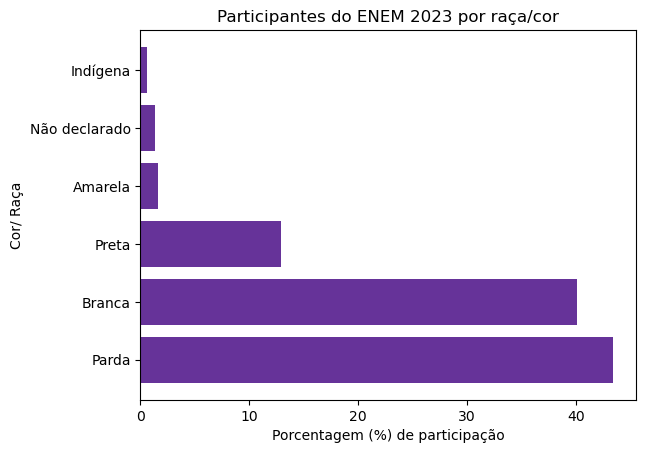

In [46]:
# Visualização da contagem de participantes em barras horizontais:
plt.barh(df_cor_raca['TP_COR_RACA'], df_cor_raca['% Participação'], color='rebeccapurple')

# Adicionar rótulos aos eixos:
plt.xlabel('Porcentagem (%) de participação')
plt.ylabel('Cor/ Raça')
plt.title('Participantes do ENEM 2023 por raça/cor')

# Salvar imagem:
plt.savefig('Participantes ENEM 2023.png')

# Exibir o gráfico
plt.show()

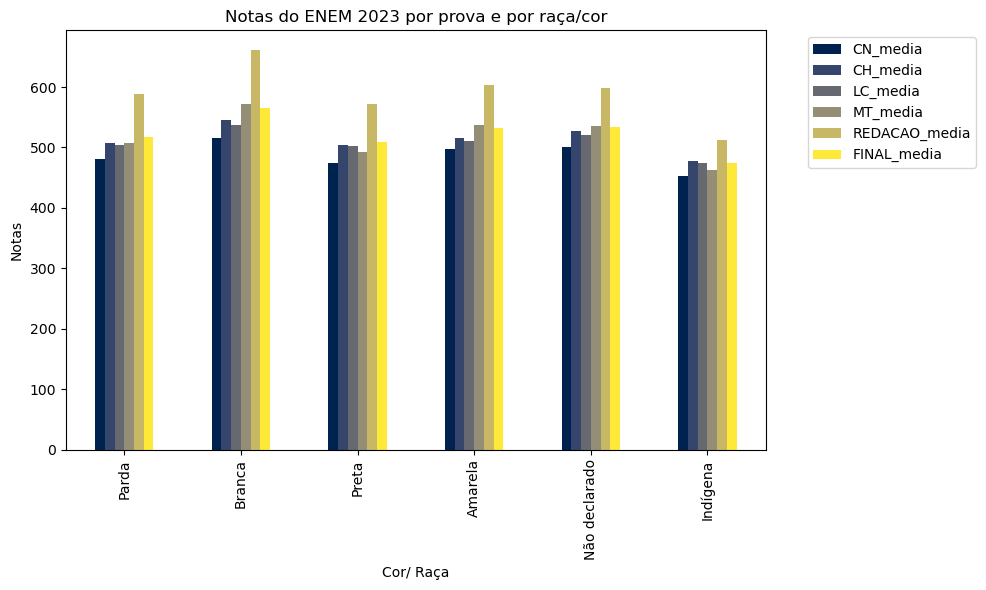

In [47]:
# Selecionar as variáveis específicas do DataFrame:
colunas_selecionadas = ['CN_media', 'CH_media', 'LC_media', 'MT_media', 'REDACAO_media', 'FINAL_media']

# Criar o gráfico de barras verticais
df_cor_raca.set_index('TP_COR_RACA')[colunas_selecionadas].plot(kind='bar', colormap='cividis', stacked=False, figsize=(10, 6))

# Adicionar rótulos aos eixos
plt.xlabel('Cor/ Raça')
plt.ylabel('Notas')
plt.title('Notas do ENEM 2023 por prova e por raça/cor')

# Mover a legenda para fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Salvar imagem:
plt.savefig('Notas do ENEM 2023 por porva e por cor-raca.png')

# Exibir o gráfico
plt.show()

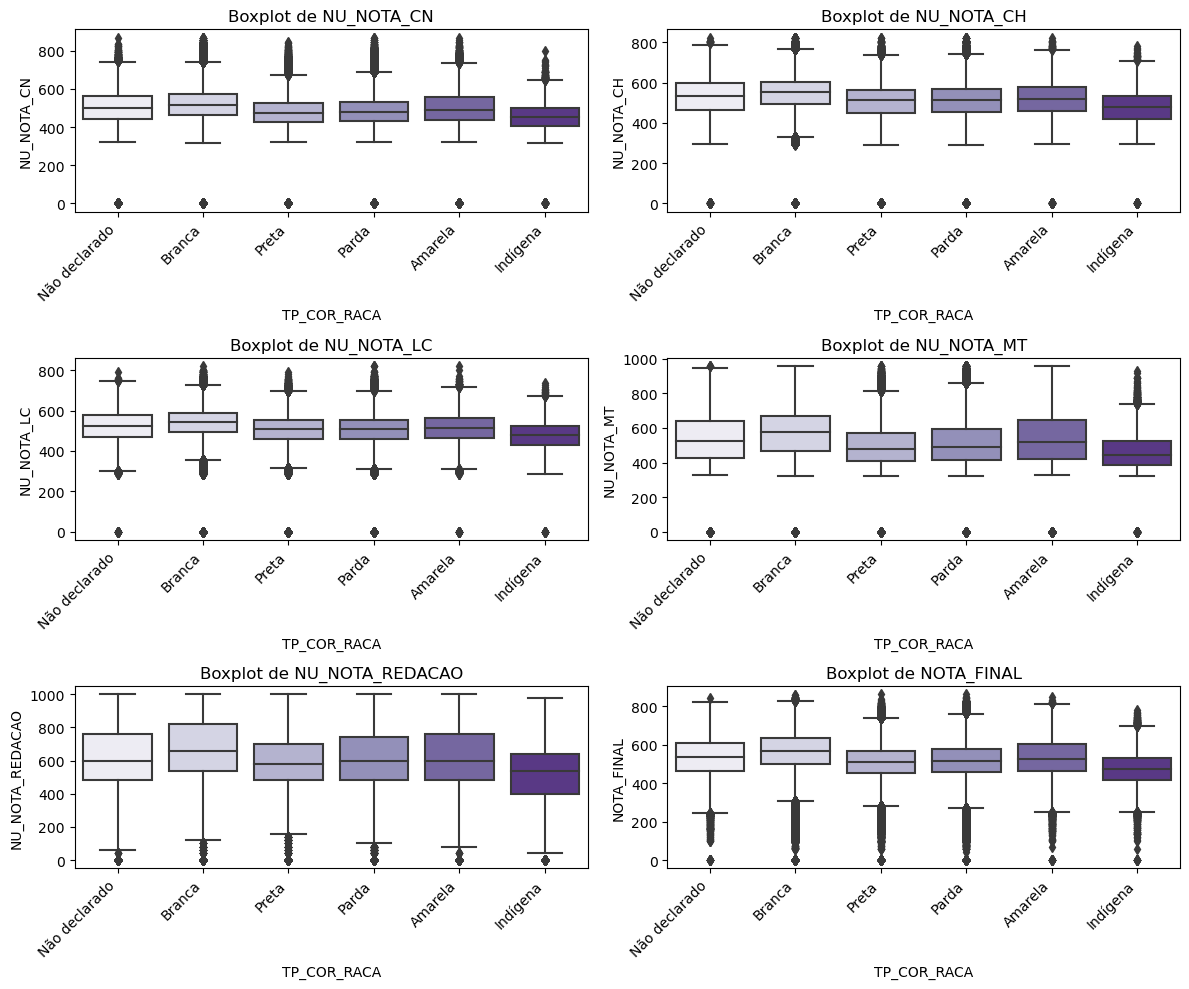

In [48]:
# Criar o gráfico de boxplot:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Variáveis a serem plotadas:
variaveis = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NOTA_FINAL']

# Lista de rótulos para o eixo X:
rotulos_desejados = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']

# Iterar sobre as variáveis e criar os boxplots
for i, var in enumerate(variaveis):
    row = i // 2
    col = i % 2
    sns.boxplot(x='TP_COR_RACA', y=var, data=df, ax=axes[row, col], palette="Purples")
    axes[row, col].set_title(f'Boxplot de {var}')

 # Substituir os valores do eixo X por strings inclinadas a 45°
    axes[row, col].set_xticklabels(rotulos_desejados, rotation=45, ha='right')
    
# Ajustar layout
plt.tight_layout()

# Salvar imagem:
plt.savefig('Boxplots.png')

# Exibir o gráfico
plt.show()

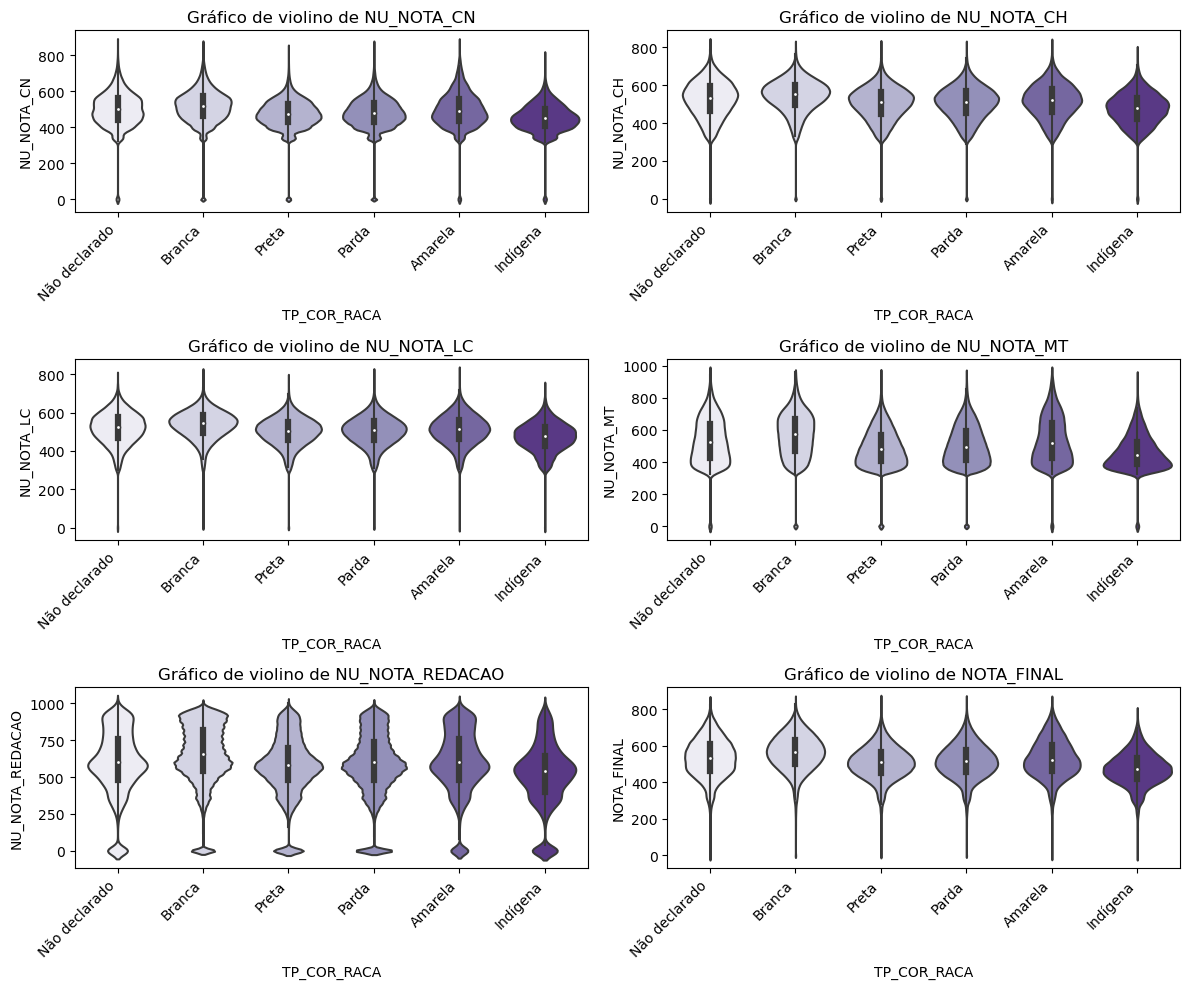

In [49]:
# Criar o gráfico de violino:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Variáveis a serem plotadas:
variaveis = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NOTA_FINAL']

# Lista de rótulos para o eixo X:
rotulos_desejados = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']

# Iterar sobre as variáveis e criar os boxplots
for i, var in enumerate(variaveis):
    row = i // 2
    col = i % 2
    sns.violinplot(x='TP_COR_RACA', y=var, data=df, ax=axes[row, col], palette="Purples")
    axes[row, col].set_title(f'Gráfico de violino de {var}')

 # Substituir os valores do eixo X por strings inclinadas a 45°
    axes[row, col].set_xticklabels(rotulos_desejados, rotation=45, ha='right')
    
# Ajustar layout
plt.tight_layout()

# Salvar imagem:
plt.savefig('Violin plot.png')

# Exibir o gráfico
plt.show()

In [50]:
# Salvar os DataFrames em Excel:
# Especificar o caminho do arquivo Excel:
caminho_arquivo_excel = r"C:\Users\hugob\OneDrive\Desktop\ENEM_2023.xlsx"

# Criar um objeto ExcelWriter:
with pd.ExcelWriter(caminho_arquivo_excel, engine='xlsxwriter') as writer:
    # Salvar os DataFrames em folhas diferentes
    df_cor_raca.to_excel(writer, sheet_name='Cor-Raca', index=False)
    df_valores_nulos.to_excel(writer, sheet_name='Valores Nulos', index=False)